### What is the relationship between store trading duration and revenue? 

c:\Users\ayah\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


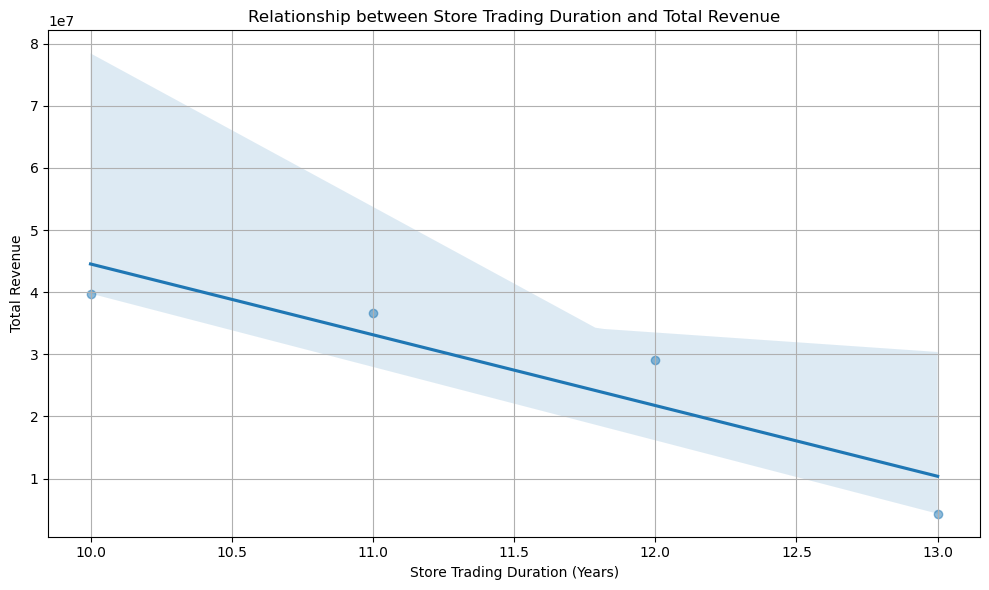

In [9]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Establish a database connection
conn = pyodbc.connect(
    r'DRIVER={ODBC Driver 17 for SQL Server};'
    r'SERVER=********\SQLEXPRESS;'
    r'DATABASE=AdventureWorks2022;'
    r'Trusted_Connection=yes;'
)

# Define the SQL query to fetch the necessary data
sql_query = """
SELECT 
    soh.OrderDate,
    sod.LineTotal
FROM Sales.SalesOrderHeader soh
JOIN Sales.SalesOrderDetail sod ON soh.SalesOrderID = sod.SalesOrderID
"""

# Execute the SQL query and store the result in a pandas DataFrame
data = pd.read_sql(sql_query, conn)

# Close the database connection
conn.close()

# Check if the DataFrame has data
if data.empty:
    print("No data available for the given query.")
else:
    # Convert OrderDate to datetime
    data['OrderDate'] = pd.to_datetime(data['OrderDate'])

    # Calculate the store trading duration in years
    data['StoreTradingDurationYears'] = (datetime.now() - data['OrderDate']).dt.days // 365

    # Group by OrderDate and calculate total revenue
    # (Assuming 'OrderDate' in grouping to get aggregate data over time)
    data_grouped = data.groupby('OrderDate').agg(
        StoreTradingDurationYears=('StoreTradingDurationYears', 'max'),
        TotalRevenue=('LineTotal', 'sum')
    ).reset_index()

    # Aggregate data by StoreTradingDurationYears
    aggregated_data = data_grouped.groupby('StoreTradingDurationYears').agg(
        TotalRevenue=('TotalRevenue', 'sum')
    ).reset_index()

    # Check if the aggregated DataFrame has data
    if aggregated_data.empty:
        print("No aggregated data available.")
    else:
        # Create scatter plot with regression line
        plt.figure(figsize=(10, 6))
        sns.regplot(x='StoreTradingDurationYears', y='TotalRevenue', data=aggregated_data, scatter_kws={'alpha':0.5})

        # Set labels and title
        plt.xlabel('Store Trading Duration (Years)')
        plt.ylabel('Total Revenue')
        plt.title('Relationship between Store Trading Duration and Total Revenue')

        # Show the plot
        plt.grid(True)
        plt.tight_layout()
        plt.show()
